In [1]:
import pandas as pd
import numpy as np

In [2]:
emails = pd.read_csv('emails.csv')

In [3]:
emails

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
emails.spam.value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

In [3]:
emails['text'] = emails['text'].apply(lambda x: x.replace('Subject:','').lower())

In [28]:
emails

,text,spam
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,"do not have money , get software cds from her...",1
...,...,...
5723,re : research and development charges to gpg ...,0
5724,"re : receipts from visit jim , thanks again...",0
5725,re : enron case study update wow ! all on th...,0
5726,"re : interest david , please , call shirley...",0


In [29]:
df_spam = emails[emails.spam==1]
df_ham = emails[emails.spam==0]

In [30]:
spam_list = df_spam['text'].tolist()
ham_list = df_ham['text'].tolist()

In [112]:
filtered_spam = ("").join(spam_list)
flitered_spam = filtered_spam.lower()

filtered_ham = ("").join(ham_list)
filtered_ham = filtered_ham.lower()

In [35]:
type(spam_list)

list

In [36]:
spam_list

[" naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  marketing

In [37]:
filtered_spam

' naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  marketing 

In [ ]:
import os
from PIL import Image
from wordcloud import WordCloud
#commment_mask = np.array(Image.open("comment.png"))
# create and generate a  word cloud image
wordcloud = WordCloud(max_font_size = 160,margin = 0 , background_color = 'white',colormap = 'Reds').generate(filtered_spam)

# wc = WordCloud(mask = cm_,colormap = 'viridis',background_color= 'white',max_font_size = 1000,contour_width = 1/2,contour_color ='steelblue').generate(f1)


# color maps : 'viridis' , 'Reds' ,'plasma' , 'magma' , 'inferno' , 'cividis' ,Greens
# background : black , white , blue

In [ ]:
# os.environ['UserProfile']+'\alice.png'
# or
#
#for root,dir_,fl in os.walk(os.getcwd()):
#    for f in fl:
#        if f[1:9]=='lice.png':
#            print(root+'\\'+f)
#
#
# writer = pd.ExcelWriter('emails.xlsx')
# emails.to_excel(writer,index=False,header=True)
# writer.save()

In [103]:
import matplotlib.pyplot as plt

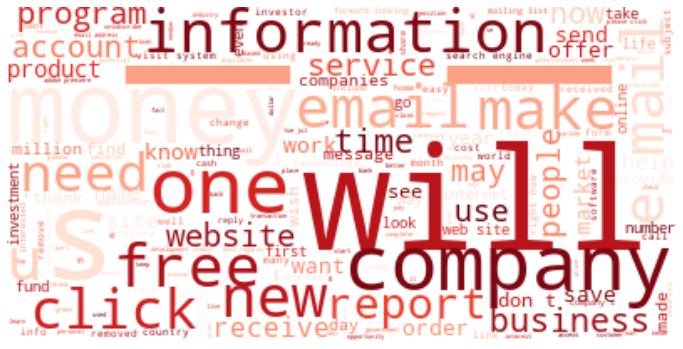

In [104]:
plt.figure(figsize = (12,8))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

In [114]:
wordcloud1 = WordCloud(max_font_size = 160 ,margin = 0 , background_color = 'white' , colormap = 'Greens').generate(filtered_ham)

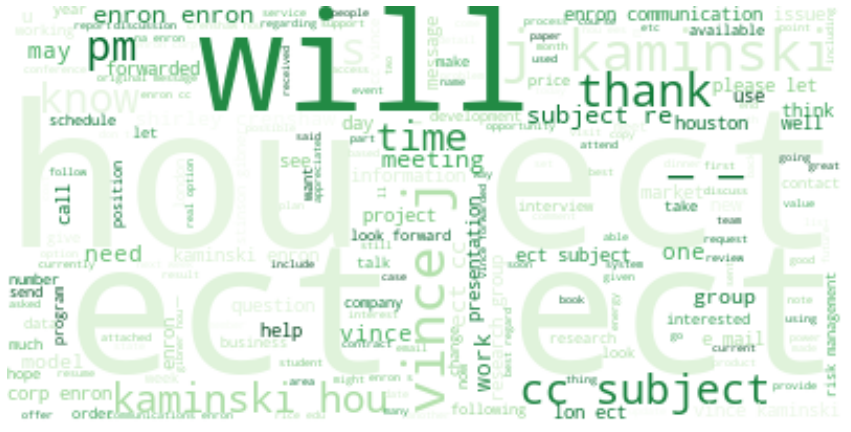

In [115]:
plt.figure(figsize=(15,12))
plt.imshow(wordcloud1, interpolation ='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

In [88]:
#from sklearn.feature_extraction.text import CountVectorizer
#matrix = CountVectorizer(lowercase = True , stop_words = 'english', min_df =0.2 , max_df= 0.95)
#x = matrix.fit_transform(emails['text']).toarray()
#matrix.get_feature_names()

In [4]:
# instead of countvectorizer we can use tfidfvectorizer for better accuarcy
# from sklearn.feature_extraction.text import TfidfVectorizer as tf
# tf_ = tf(stop_words='english')
# x = tf_.fit_transform(emails['text']).toarray()
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer as tf
tf_ = tf(stop_words='english')
x = tf_.fit_transform(emails['text'])
x = linear_kernel(x,x)  # instead of "".toarray()"" we can use this, linear_kernel

In [5]:
x.shape

(5728, 5728)

In [6]:
len(x[0])

5728

In [7]:
len(emails)

5728

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, emails['spam'],test_size = 0.2 , random_state = 12345)

In [ ]:
from sklearn.tree import DecisionTreeClassifier as  dtc
tree_model = dtc()
tree_model.fit(x_train,y_train)
pred = tree_model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix as cm ,accuracy_score as acs
cm(y_pred = pred, y_true = y_test)

In [ ]:
acs(y_pred = pred, y_true = y_test)

In [9]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [11]:
rf = rfc(n_jobs=-1)
rf.fit(x_train , y_train)

RandomForestClassifier(n_jobs=-1)

In [12]:
rfpred = rf.predict(x_test)

In [15]:
cm(y_pred = rfpred, y_true = y_test)

array([[846,   6],
       [ 10, 284]], dtype=int64)

In [1]:
acs(y_pred = rfpred, y_true = y_test)

In [17]:
# any classifier model can be applied here in this case as this is a classification model

In [18]:
rfc.predict(emails.text[0])

TypeError: predict() missing 1 required positional argument: 'X'

In [19]:
emails.text[0])

" naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  marketing 

In [ ]:
# TWEETS

In [1]:
import pandas as pd
import numpy as np

In [50]:
tweets = pd.read_csv('tweets.csv')

In [51]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [52]:
import re

In [53]:
# create regular expression that says - search for all paterns that have @followed
# by one or more alpnabets

regexp = re.compile(r"@(\w+)\b")

In [54]:
t= regexp.findall("This is @value and @simplilearn that is also an @dataset and I am also giving this as datascience @where")

In [55]:
t

['value', 'simplilearn', 'dataset', 'where']

In [56]:
def get_at_val(x):
    
    # if the length of passed string is > 0 ... i.s not an empty string
    if len(x) > 0:
        list_of_at = []
        
        # find al the occurances asdfined in the rege
        output = regexp.findall(x)
        
        #  loop across all the occurances and check if it does exis , then do nothing else append
        for j in output:
            if j not in list_of_at :
                list_of_at.append(str(j))
    return(list_of_at)

In [57]:
get_at_val("This is @value and @simplilearn so @value that is also an @dataset and I am also giving this as datascience @where")

['value', 'simplilearn', 'dataset', 'where']

In [58]:
tweets['list_of_at'] = tweets['text'].apply(lambda x: get_at_val(x))
# tweets['list_of_at'] = tweets.text.str.findall(r'@(\w+)\b')

In [59]:
tweets['list_of_at'].head()

0    [VirginAmerica, dhepburn]
1              [VirginAmerica]
2              [VirginAmerica]
3              [VirginAmerica]
4              [VirginAmerica]
Name: list_of_at, dtype: object

In [60]:
tweets.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'list_of_at'],
      dtype='object')

In [13]:
final_list = []
for i in range(tweets.shape[0]):
    val = tweets.iloc[i,15] 
    for j in range(len(val)):
        if val[j] not in final_list:
            final_list.append(val[j])

In [14]:
final_list

['VirginAmerica',
 'dhepburn',
 'virginamerica',
 'Australia',
 'virginmedia',
 'Pacificbiznews',
 'freddieawards',
 'ladygaga',
 'carrieunderwood',
 'Carrieunderwood',
 'LadyGaga',
 'CarrieUnderwood',
 'Travelzoo',
 'SouthwestAir',
 'JetBlue',
 'FiDiFamilies',
 'ChrysiChrysic',
 'reallytallchris',
 'sfo',
 'WaltDisneyWorld',
 'jessicajaymes',
 'Dulles_Airport',
 'Dallas_News',
 'united',
 'TTINAC11',
 'asarco_ES_ar',
 'love',
 'FastCompany',
 'FAANews',
 'NewsVP',
 'iol',
 'LizaUtter',
 'RenttheRunway',
 'KCIAirport',
 'VirginAtlantic',
 'ATWOnline',
 'GoPro',
 'NYTimes',
 'flyLAXairport',
 'CAPA_Aviation',
 'Reuters',
 'madbee95',
 'FreyaBevan_Fund',
 'virginAmerica',
 'SSal',
 'shrinerack',
 'SuuperG',
 'GMA',
 'AmericanAir',
 'Visa',
 'giannilee',
 'skift',
 'KarinSLee',
 'TheNationalUAE',
 'Tinder',
 'AUStinAirport',
 'DallasLoveField',
 'usatoday',
 'JezzieGoldz',
 'fargoairport',
 'Starryeyes_Dev_',
 'JenniferDawnPro',
 'CheerTymeDad',
 'highbuddyyy',
 'United',
 'aegeanairlines

In [15]:
file = open("Reference_new1.txt",'w')
for each in final_list:
    file.write(each+"\n")
file.close()

In [16]:
#with open('refere.txt','w') as fd:
#    for i in final:
#         fd.write(i+'\n')

In [17]:
# with open('latest.txt','r') as hh:
#     lk = hh.read().split('\n')

In [18]:
# task 2

In [19]:
tweets['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [20]:
import nltk

In [21]:
def get_np(x):
    if len(x)>0:
        # grammer is defined earlier
        grammar = r"NP:{<DT>?<JJ>*<NN|NNS|NNP|NNPS>}"
        
        # parse the grammer using Regexpparser
        parser = nltk.RegexpParser(grammar)
        
        # create POS tags sfter word otkennization
        tokens = nltk.pos_tag(nltk.tokenize.word_tokenize(x))
        
        # parse the tokens to get a syntax tree
        parsed_val = parser.parse(tokens)
        # print (parsed_val)
        
        noun_phrases_list = []
        
        # loop across all the subtrees
        for tree in parsed_val.subtrees():
            
            # if the tree has a lebel NP -> defined earlier in the grammar
            if tree.label() =='NP':
                noun_phrase = []
            
            #loop across all the levels and append
                for leaf in tree.leaves():
                    noun_phrase.append(leaf[0])
                noun_phrases_list.append(noun_phrase)
                                     
        # return the list of noun phrases
        return(noun_phrases_list)

In [22]:
get_np('The little mouse ate the yellow cheese')

[['The', 'little', 'mouse'], ['the', 'yellow', 'cheese']]

In [25]:
tweets.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [24]:
def np_(x):
    if len(x)>0:
        grammar = r"NP:{<DT>?<JJ>*<NN|NNS|NNP|NNPS>}"        
        parser = nltk.RegexpParser(grammar)
        tokens = nltk.pos_tag(nltk.tokenize.word_tokenize(x))
        parsed_val = parser.parse(tokens)
        NPLIST = []
        for tree in parsed_val.subtrees():
            if tree.label()=='NP':
                npl = []
                for leaf in tree.leaves():
                    npl.append(leaf[0])
                NPLIST.append(npl)
        return(NPLIST) 


lst = []
for i in range(df.shape[1]):
    em = df.columns[i]
    if df[em].dtypes=='object':
        for j in df.iloc[:,i]:
            if type(j)==str:
                for k in np_(j.lower().replace("@","")):
                    if k not in lst:
                        lst.append(k)
    
    
            
final = []
for i in lst:
    if len(i)==3:
        if nltk.pos_tag([i[0]])[0][1]=='DT':
            final.append(" ".join(i))

with open('nounphrase.txt','w',encoding='utf-8') as fg:
    for i in final:
        fg.write(i+'\n')

In [3]:
from PIL import Image

In [ ]:
Image('alice.p')

In [ ]:
# homework define verb phrase